# Denoising types
- Total variation (TV)
- Bilateral
- Wavelet denoising
- Non-local means denoising

In [1]:
# Ensure necessary modules are installed
%pip install matplotlib numpy opencv-python pandas scikit-image tqdm ipywidgets tensorflow-macos tensorflow-metal scikit-image


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Bilateral denoise
 - Grayscaled Images

In [5]:
import glob
import random
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.restoration import denoise_bilateral

# Set the seed for reproducibility
random.seed(0)

# Get image paths
vehicle = sorted(glob.glob('./VehicleImage/vehicles/*/*.png'))
nonvehicle = sorted(glob.glob('./VehicleImage/non-vehicles/*/*.png'))

# Shuffle the image paths
random.shuffle(vehicle)
random.shuffle(nonvehicle)

# Function to denoise images using bilateral filter from skimage
def denoise_image_bilateral(image_path):
    img = img_as_float(io.imread(image_path))
    denoised_img = denoise_bilateral(img, sigma_color=0.05, sigma_spatial=5,bins=2, channel_axis=-1)
    return denoised_img

# Denoise vehicle images
denoised_vehicle_bilateral = [denoise_image_bilateral(img_path) for img_path in vehicle]

# Denoise non-vehicle images
denoised_nonvehicle_bilateral = [denoise_image_bilateral(img_path) for img_path in nonvehicle]


# Function to display images
def display_images(original_paths, denoised_images, title):
    n = len(original_paths)
    plt.figure(figsize=(20, 10))
    for i in range(n):
        # Display original image
        plt.subplot(2, n, i + 1)
        original_img = io.imread(original_paths[i])
        plt.imshow(original_img)
        plt.title(f'Original {title} {i+1}')
        plt.axis('off')
        
        # Display denoised image
        plt.subplot(2, n, i + 1 + n)
        plt.imshow(denoised_images[i])
        plt.title(f'Denoised {title} {i+1}')
        plt.axis('off')
    plt.show()



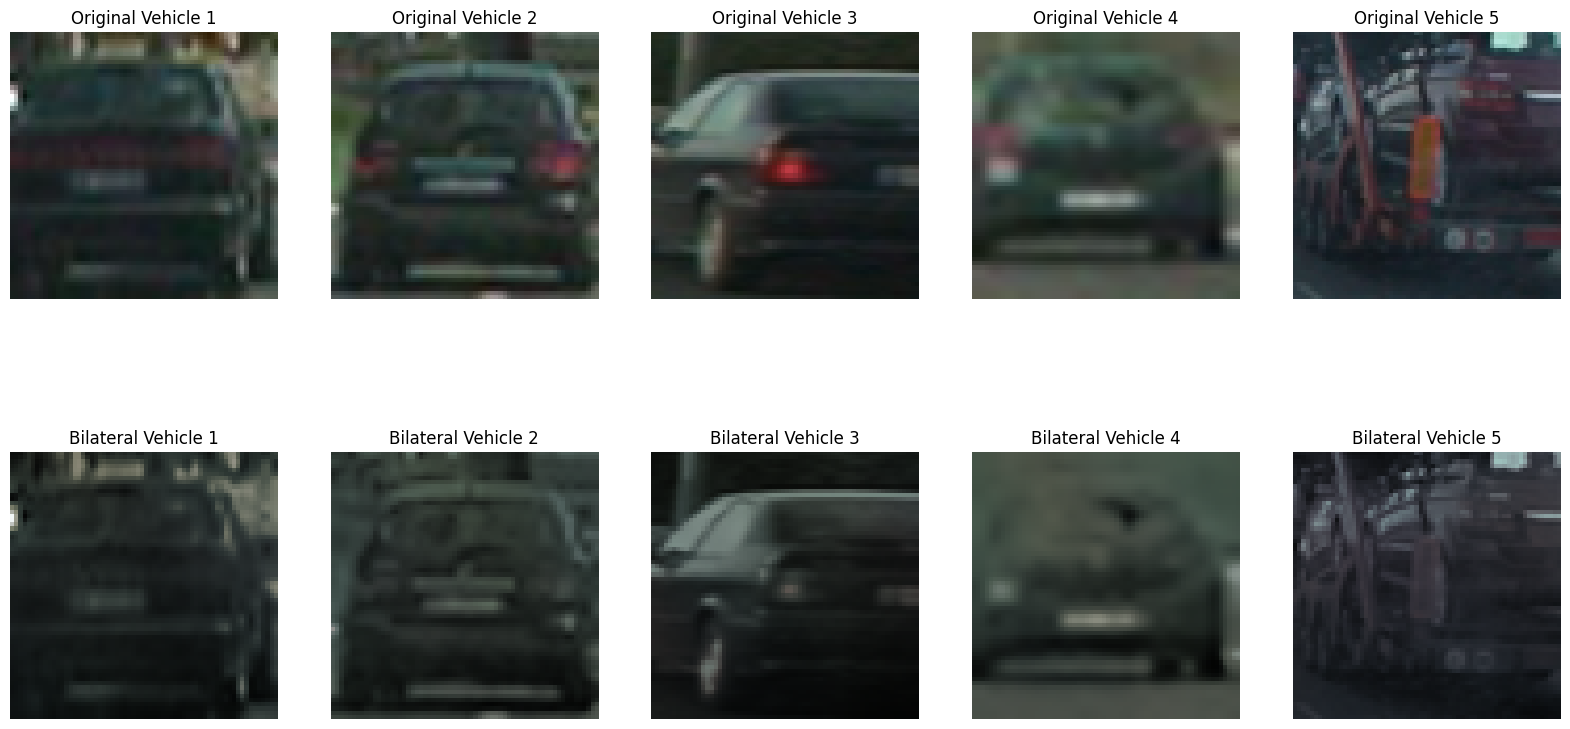

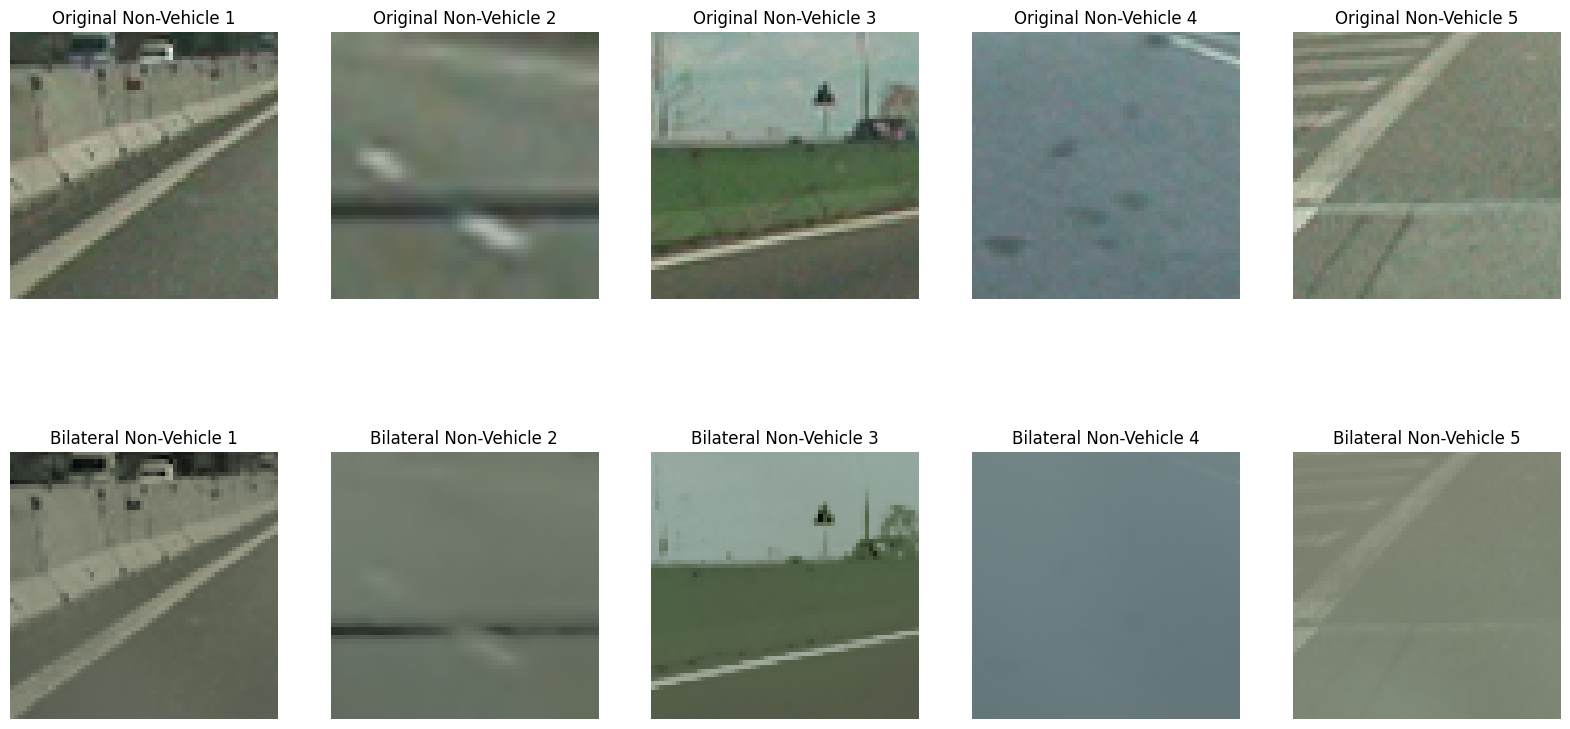

In [13]:
# Display vehicle images
display_images(vehicle[:5], denoised_vehicle_bilateral[:5], 'Vehicle')

# Display non-vehicle images
display_images(nonvehicle[:5], denoised_nonvehicle_bilateral[:5], 'Non-Vehicle')

## Applying `denoise_bilateral` on One Vehicle Image with Different Argument Values

In this section, we will apply the `denoise_bilateral` function on a single vehicle image using different argument values. We will then display and compare the results with the original image.

We will experiment with the following parameter values:
- `sigma_color`: 0.05, 0.1, 0.2
- `sigma_spatial`: 5, 10, 15

This will help us understand the effect of these parameters on the denoising process.


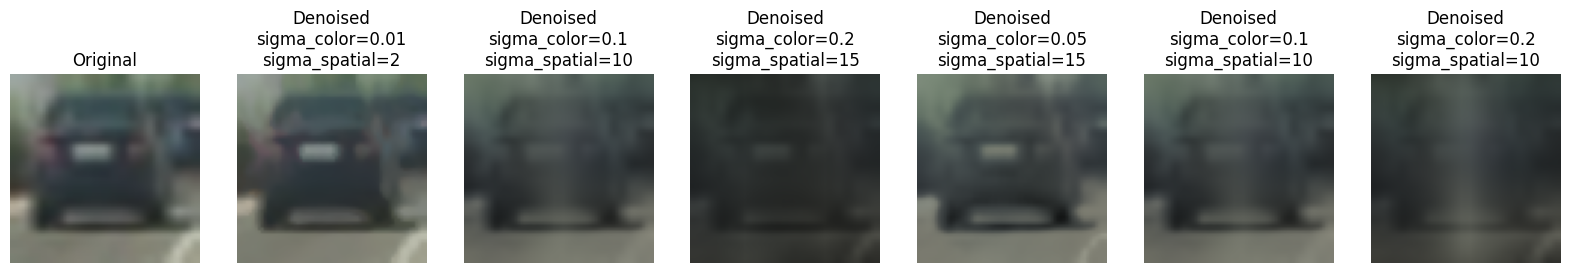

In [11]:
import glob
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.restoration import denoise_bilateral

# Load a single vehicle image
# Use one of the already loaded vehicle images
vehicle = sorted(glob.glob('./VehicleImage/vehicles/*/*.png'))
image_path = vehicle[0]  # Use the first vehicle image from the loaded list
original_image = img_as_float(io.imread(image_path))

# Define different sets of arguments for denoise_bilateral
denoise_params = [
    {'sigma_color': 0.01, 'sigma_spatial': 2},
    {'sigma_color': 0.1, 'sigma_spatial': 10},
    {'sigma_color': 0.2, 'sigma_spatial': 15},
    {'sigma_color': 0.05, 'sigma_spatial': 15 },
    {'sigma_color': 0.1, 'sigma_spatial': 10 },
    {'sigma_color': 0.2, 'sigma_spatial': 10 },
]

# Apply denoise_bilateral with different parameters
denoised_images = []
for params in denoise_params:
    denoised_img = denoise_bilateral(original_image, **params, channel_axis=-1)
    denoised_images.append((denoised_img, params))

# Function to display images
def display_images(original_img, denoised_images):
    n = len(denoised_images)
    plt.figure(figsize=(20, 10))
    
    # Display original image
    plt.subplot(2, n + 1, 1)
    plt.imshow(original_img)
    plt.title('Original')
    plt.axis('off')
    
    # Display denoised images
    for i, (denoised_img, params) in enumerate(denoised_images):
        plt.subplot(2, n + 1, i + 2)
        plt.imshow(denoised_img)
        plt.title(f'Denoised\nsigma_color={params["sigma_color"]}\nsigma_spatial={params["sigma_spatial"]}')
        plt.axis('off')
    
    plt.show()

# Display the images
display_images(original_image, denoised_images)

## now we will try a different type of denoise
- total variation (TV) 

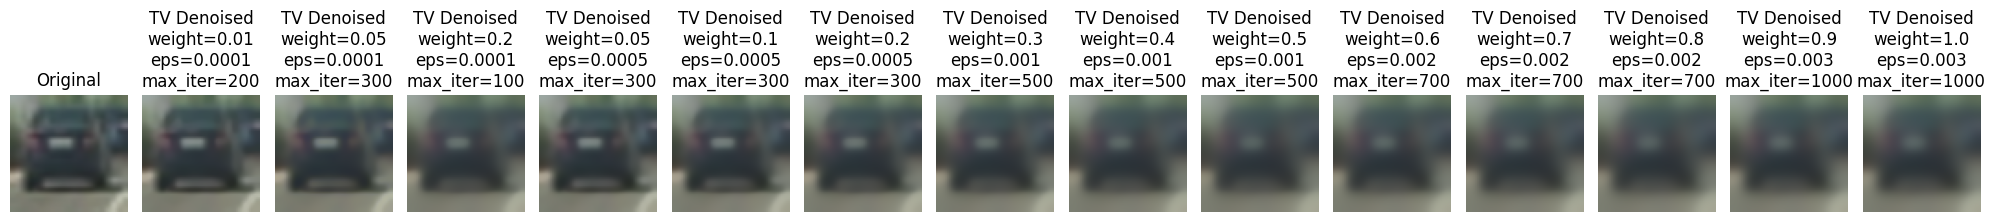

In [6]:
# try total variation on 1 vehicle image and compare it to the original
import glob
from skimage import io, img_as_float
from skimage.restoration import denoise_tv_chambolle
import matplotlib.pyplot as plt

# Load a single vehicle image
# Use one of the already loaded vehicle images
vehicle = sorted(glob.glob('./VehicleImage/vehicles/*/*.png'))
image_path = vehicle[0]  # Use the first vehicle image from the loaded list
original_image = img_as_float(io.imread(image_path))

# Define different sets of arguments for denoise_tv_chambolle

# Define different sets of arguments for denoise_tv_chambolle with varying eps and max_num_iter
denoise_params = [
    {'weight': 0.01, 'eps': 1.0e-4, 'max_num_iter': 200, 'channel_axis': -1},
    {'weight': 0.05, 'eps': 1.0e-4, 'max_num_iter': 300, 'channel_axis': -1},
    {'weight': 0.2, 'eps': 1.0e-4, 'max_num_iter': 100, 'channel_axis': -1},
    {'weight': 0.05, 'eps': 5.0e-4, 'max_num_iter': 300, 'channel_axis': -1},
    {'weight': 0.1, 'eps': 5.0e-4, 'max_num_iter': 300, 'channel_axis': -1},
    {'weight': 0.2, 'eps': 5.0e-4, 'max_num_iter': 300, 'channel_axis': -1},
    {'weight': 0.3, 'eps': 1.0e-3, 'max_num_iter': 500, 'channel_axis': -1},
    {'weight': 0.4, 'eps': 1.0e-3, 'max_num_iter': 500, 'channel_axis': -1},
    {'weight': 0.5, 'eps': 1.0e-3, 'max_num_iter': 500, 'channel_axis': -1},
    {'weight': 0.6, 'eps': 2.0e-3, 'max_num_iter': 700, 'channel_axis': -1},
    {'weight': 0.7, 'eps': 2.0e-3, 'max_num_iter': 700, 'channel_axis': -1},
    {'weight': 0.8, 'eps': 2.0e-3, 'max_num_iter': 700, 'channel_axis': -1},
    {'weight': 0.9, 'eps': 3.0e-3, 'max_num_iter': 1000, 'channel_axis': -1},
    {'weight': 1.0, 'eps': 3.0e-3, 'max_num_iter': 1000, 'channel_axis': -1},
]

# Apply denoise_tv_chambolle with different
denoised_images = []
for params in denoise_params:
    denoised_img = denoise_tv_chambolle(original_image, **params)
    denoised_images.append((denoised_img, params))
    
    
# New function to display images denoised using total variation denoising
def display_tv_images(original_img, denoised_images):
    n = len(denoised_images)
    plt.figure(figsize=(20, 10))
    
    # Display original image
    plt.subplot(2, n + 1, 1)
    plt.imshow(original_img)
    plt.title('Original')
    plt.axis('off')
    
    # Display denoised images
    for i, (denoised_img, params) in enumerate(denoised_images):
        plt.subplot(2, n + 1, i + 2)
        plt.imshow(denoised_img)
        plt.title(f'TV Denoised\nweight={params["weight"]}\neps={params["eps"]}\nmax_iter={params["max_num_iter"]}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Extract only the denoised images for display
denoised_images_only = [img for img, params in denoised_images]

# Display the images and compare the result with the original image
display_tv_images(original_image, denoised_images)





# Summary/Algorithm Overview¶

- The Histogram of Oriented Gradient (HOG) feature descriptor is popular for object detection.

- Theoretically, we compute a HOG by:
    - (optional) global image normalisation
    - computing the gradient image in x and y
    - computing gradient histograms
    - normalising across blocks
    - flattening into a feature vector


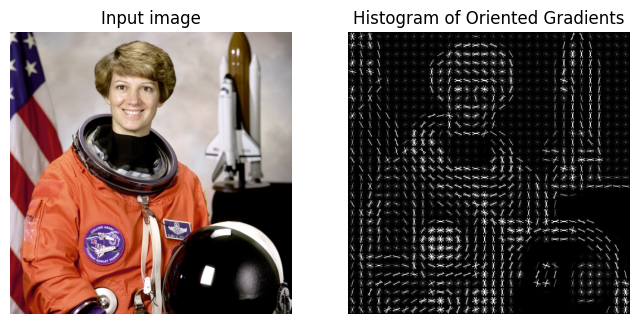

In [4]:

from skimage import data, exposure
from skimage.feature import hog  # Import the hog function

image = data.astronaut()

fd, hog_image = hog(
    image,
    orientations=8,
    pixels_per_cell=(16, 16),
    cells_per_block=(1, 1),
    visualize=True,
    channel_axis=-1,
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

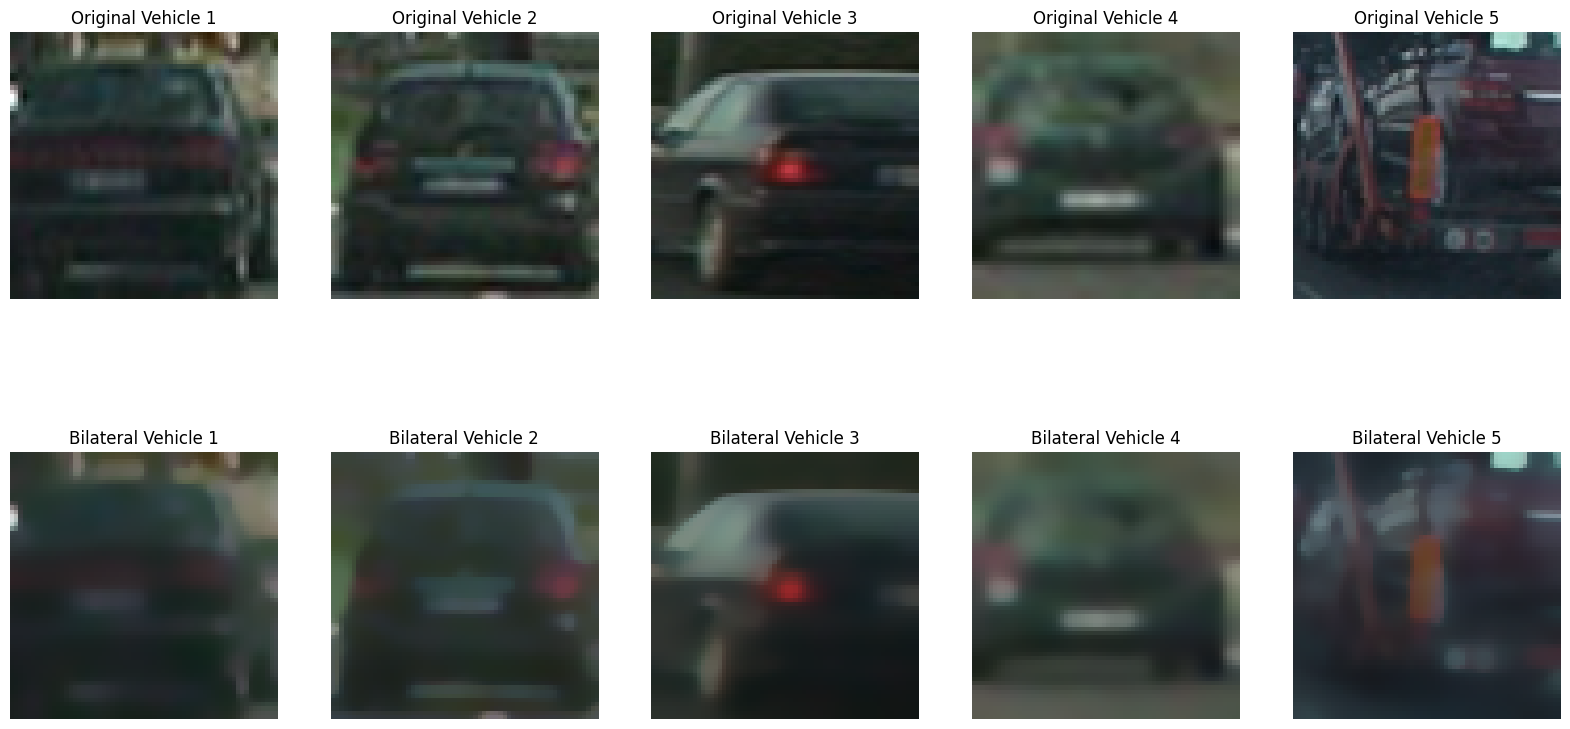

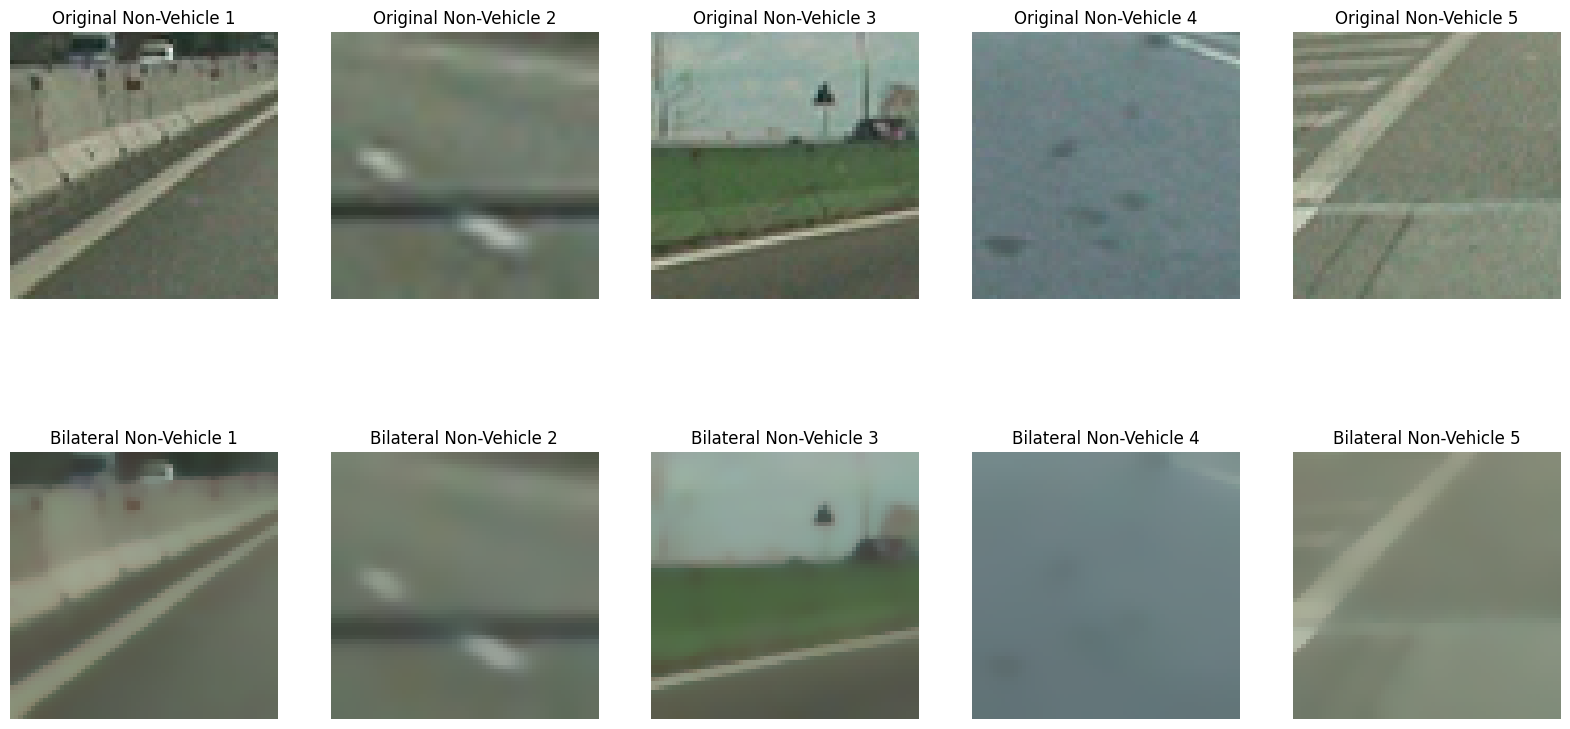

In [28]:
# go thorugh my dataset and apply total variation denoising and show the images before and after the denoising process 
# i want to you to use the total variation denoising method from skimage.restoration module
# and i want to use unique variable names for each variable that you create in this code cell

from skimage.restoration import denoise_tv_chambolle
import glob
import random
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.restoration import denoise_bilateral

# Set the seed for reproducibility
random.seed(0)

# Get image paths
vehicle = sorted(glob.glob('./VehicleImage/vehicles/*/*.png'))
nonvehicle = sorted(glob.glob('./VehicleImage/non-vehicles/*/*.png'))

# Shuffle the image paths
random.shuffle(vehicle)
random.shuffle(nonvehicle)

# Function to denoise images using total variation denoising from skimage
def denoise_image_tv(image_path):
    img = img_as_float(io.imread(image_path))
    denoised_img = denoise_tv_chambolle(img, weight=0.1, channel_axis=-1)
    return denoised_img

# Denoise vehicle images
denoised_vehicle_tv = [denoise_image_tv(img_path) for img_path in vehicle]

# Denoise non-vehicle images
denoised_nonvehicle_tv = [denoise_image_tv(img_path) for img_path in nonvehicle]

# Display vehicle images
display_images(vehicle[:5], denoised_vehicle_tv[:5], 'Vehicle')

# Display non-vehicle images
display_images(nonvehicle[:5], denoised_nonvehicle_tv[:5], 'Non-Vehicle')



## Next Step: HOG Features and One-Class SVM
For the next step, we will extract the HOG (Histogram of Oriented Gradients) features from the TV denoised images. We will then use a one-class SVM (Support Vector Machine) to classify the images. Finally, we will compare the results with those obtained from the original images.